<a href="https://colab.research.google.com/github/homerabbitsky/HelloAI/blob/main/assignment8_pt1_GAN_pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

PATH = "/content/drive/MyDrive/models/classifier-digits.pt"
loadmodel = False

# Set device to either CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("xla")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

if loadmodel:
  model = Net()
  model.load_state_dict(torch.load(PATH))
  model = model.to(device)
  model.eval()

else:
  # Create an instance of the model and send it to the device
  model = Net().to(device)

  # Load the MNIST dataset and apply transformations
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
  ])

  train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
  test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

  # Set batch size and create data loaders
  batch_size = 64

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


  # Define the optimizer and loss function
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
  criterion = nn.CrossEntropyLoss()

  # Train the model
  num_epochs = 2

  for epoch in range(num_epochs):
      model.train()
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(device), target.to(device)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          if batch_idx % 100 == 0:
              print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(train_loader.dataset),
                  100. * batch_idx / len(train_loader), loss.item()))

      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += criterion(output, target).item()
              pred = output.argmax(dim=1, keepdim=True)
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))    
  torch.save(model.state_dict(), PATH)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.326512
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.107016
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.712081
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.348912
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.525622
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.256229
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.287653
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.265527
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.285713
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.197437
Test set: Average loss: 0.0030, Accuracy: 9369/10000 (94%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.475331
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.197068
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.282996
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.280510
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.165859
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.083239
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.184656
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.135669
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.246454
Tr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch [1/10] Batch [1/469] Discriminator Loss: 1.4143 Generator Loss: 0.7032
Epoch [1/10] Batch [101/469] Discriminator Loss: 0.3300 Generator Loss: 1.8271
Epoch [1/10] Batch [201/469] Discriminator Loss: 0.6213 Generator Loss: 1.9574
Epoch [1/10] Batch [301/469] Discriminator Loss: 1.0402 Generator Loss: 1.0073
Epoch [1/10] Batch [401/469] Discriminator Loss: 1.1117 Generator Loss: 1.2379


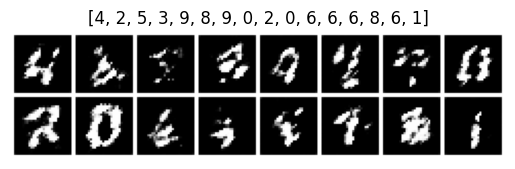

average prediction confidence over 100 predictions: 0.3894892930984497
prediction counts: [8, 7, 15, 17, 2, 7, 15, 6, 16, 7]
epoch time: 17.4596164226532, total time: 17.4596164226532
Epoch [2/10] Batch [1/469] Discriminator Loss: 1.1781 Generator Loss: 0.7781
Epoch [2/10] Batch [101/469] Discriminator Loss: 1.1736 Generator Loss: 0.9483
Epoch [2/10] Batch [201/469] Discriminator Loss: 1.1473 Generator Loss: 0.9974
Epoch [2/10] Batch [301/469] Discriminator Loss: 1.0842 Generator Loss: 0.8807
Epoch [2/10] Batch [401/469] Discriminator Loss: 1.0942 Generator Loss: 1.1099


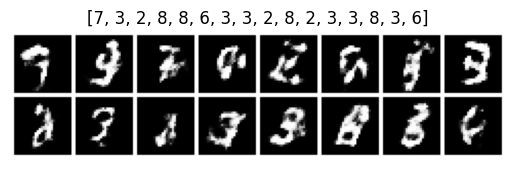

average prediction confidence over 100 predictions: 0.4039338529109955
prediction counts: [15, 8, 31, 39, 3, 18, 20, 12, 31, 23]
epoch time: 17.33621096611023, total time: 34.79582738876343
Epoch [3/10] Batch [1/469] Discriminator Loss: 1.2041 Generator Loss: 0.4559
Epoch [3/10] Batch [101/469] Discriminator Loss: 1.0126 Generator Loss: 1.1404
Epoch [3/10] Batch [201/469] Discriminator Loss: 1.0116 Generator Loss: 0.8598
Epoch [3/10] Batch [301/469] Discriminator Loss: 1.0531 Generator Loss: 0.6529
Epoch [3/10] Batch [401/469] Discriminator Loss: 0.9555 Generator Loss: 1.2205


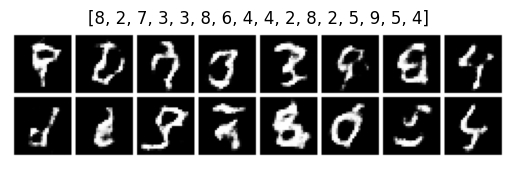

average prediction confidence over 100 predictions: 0.46414443850517273
prediction counts: [21, 10, 50, 50, 12, 26, 28, 25, 45, 33]
epoch time: 16.63092875480652, total time: 51.426756143569946
Epoch [4/10] Batch [1/469] Discriminator Loss: 0.9873 Generator Loss: 1.4340
Epoch [4/10] Batch [101/469] Discriminator Loss: 1.1075 Generator Loss: 0.7141
Epoch [4/10] Batch [201/469] Discriminator Loss: 1.0889 Generator Loss: 1.3269
Epoch [4/10] Batch [301/469] Discriminator Loss: 1.0692 Generator Loss: 0.7359
Epoch [4/10] Batch [401/469] Discriminator Loss: 1.1085 Generator Loss: 1.3331


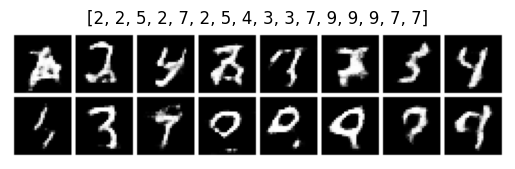

average prediction confidence over 100 predictions: 0.43848472833633423
prediction counts: [23, 18, 66, 68, 17, 32, 35, 44, 54, 43]
epoch time: 16.288377046585083, total time: 67.71513319015503
Epoch [5/10] Batch [1/469] Discriminator Loss: 1.1152 Generator Loss: 1.1842
Epoch [5/10] Batch [101/469] Discriminator Loss: 1.0704 Generator Loss: 0.7554
Epoch [5/10] Batch [201/469] Discriminator Loss: 1.1457 Generator Loss: 0.9080
Epoch [5/10] Batch [301/469] Discriminator Loss: 1.1248 Generator Loss: 0.7440
Epoch [5/10] Batch [401/469] Discriminator Loss: 1.1113 Generator Loss: 0.9833


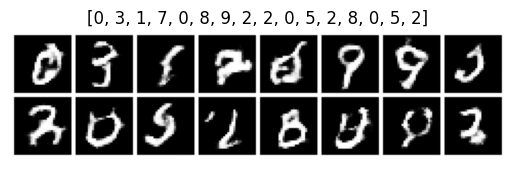

average prediction confidence over 100 predictions: 0.4515577554702759
prediction counts: [32, 22, 87, 76, 26, 43, 40, 51, 66, 57]
epoch time: 16.66757106781006, total time: 84.38270425796509
Epoch [6/10] Batch [1/469] Discriminator Loss: 1.0974 Generator Loss: 0.8357
Epoch [6/10] Batch [101/469] Discriminator Loss: 1.1532 Generator Loss: 0.6258
Epoch [6/10] Batch [201/469] Discriminator Loss: 1.0762 Generator Loss: 0.7990
Epoch [6/10] Batch [301/469] Discriminator Loss: 1.1211 Generator Loss: 0.6788
Epoch [6/10] Batch [401/469] Discriminator Loss: 1.1329 Generator Loss: 0.8309


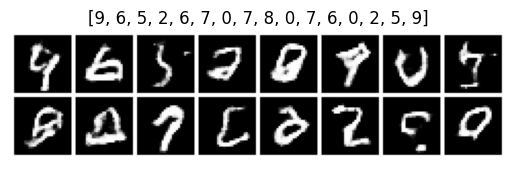

average prediction confidence over 100 predictions: 0.4447208344936371
prediction counts: [43, 27, 97, 85, 32, 57, 51, 69, 74, 65]
epoch time: 17.09844207763672, total time: 101.4811463356018
Epoch [7/10] Batch [1/469] Discriminator Loss: 1.1096 Generator Loss: 0.9491
Epoch [7/10] Batch [101/469] Discriminator Loss: 1.1026 Generator Loss: 1.1796
Epoch [7/10] Batch [201/469] Discriminator Loss: 1.1232 Generator Loss: 0.7855
Epoch [7/10] Batch [301/469] Discriminator Loss: 1.0728 Generator Loss: 1.2623
Epoch [7/10] Batch [401/469] Discriminator Loss: 1.0734 Generator Loss: 0.7708


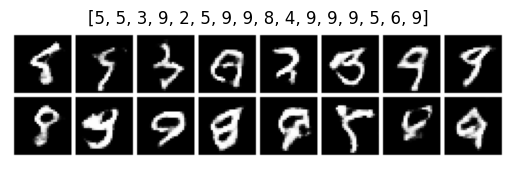

average prediction confidence over 100 predictions: 0.47581976652145386
prediction counts: [49, 35, 110, 91, 37, 73, 58, 76, 82, 89]
epoch time: 16.30098819732666, total time: 117.78213453292847
Epoch [8/10] Batch [1/469] Discriminator Loss: 1.1640 Generator Loss: 0.5689
Epoch [8/10] Batch [101/469] Discriminator Loss: 1.1202 Generator Loss: 1.2415
Epoch [8/10] Batch [201/469] Discriminator Loss: 1.1362 Generator Loss: 0.6533
Epoch [8/10] Batch [301/469] Discriminator Loss: 1.0297 Generator Loss: 1.0794
Epoch [8/10] Batch [401/469] Discriminator Loss: 1.1199 Generator Loss: 0.9495


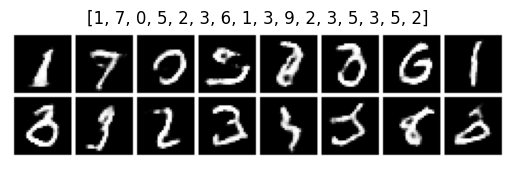

average prediction confidence over 100 predictions: 0.4923143684864044
prediction counts: [62, 47, 125, 105, 42, 83, 65, 82, 88, 101]
epoch time: 16.60612392425537, total time: 134.38825845718384
Epoch [9/10] Batch [1/469] Discriminator Loss: 1.1168 Generator Loss: 0.6026
Epoch [9/10] Batch [101/469] Discriminator Loss: 1.0335 Generator Loss: 0.9254
Epoch [9/10] Batch [201/469] Discriminator Loss: 1.1158 Generator Loss: 0.6632
Epoch [9/10] Batch [301/469] Discriminator Loss: 1.0559 Generator Loss: 1.3082
Epoch [9/10] Batch [401/469] Discriminator Loss: 1.0429 Generator Loss: 0.9699


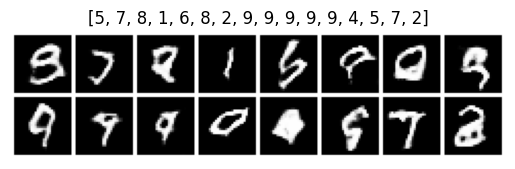

average prediction confidence over 100 predictions: 0.4762384593486786
prediction counts: [70, 56, 141, 116, 51, 91, 67, 90, 99, 119]
epoch time: 16.74330472946167, total time: 151.1315631866455
Epoch [10/10] Batch [1/469] Discriminator Loss: 0.9646 Generator Loss: 0.9291
Epoch [10/10] Batch [101/469] Discriminator Loss: 1.1229 Generator Loss: 1.6352
Epoch [10/10] Batch [201/469] Discriminator Loss: 1.0417 Generator Loss: 0.8233
Epoch [10/10] Batch [301/469] Discriminator Loss: 1.0782 Generator Loss: 0.9596
Epoch [10/10] Batch [401/469] Discriminator Loss: 0.9565 Generator Loss: 0.9091


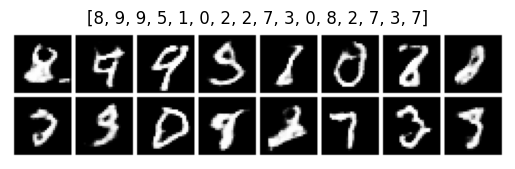

average prediction confidence over 100 predictions: 0.45611968636512756
prediction counts: [80, 61, 156, 126, 55, 108, 74, 100, 108, 132]
epoch time: 17.89762592315674, total time: 169.02918910980225


In [5]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# flag for saving/loading
PATH_G = "/content/drive/MyDrive/models/generator-digits.pt"
PATH_D = "/content/drive/MyDrive/models/discriminator-digits.pt"
loadgan = False

# Set random seed for reproducibility
torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

if loadgan:
  generator.load_state_dict(torch.load(PATH_G))
  generator = generator.to(device)
  generator.eval()
  discriminator.load_state_dict(torch.load(PATH_D))
  discriminator = discriminator.to(device)
  discriminator.eval()

else:
  # Define the loss function and optimizer
  criterion = nn.BCELoss()
  generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
  discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

  # Load the dataset
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
  ])
  dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
  dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

  # Define the number of epochs and the device to use
  num_epochs = 10
  device = torch.device('cuda')

  # Move the generator and discriminator networks to the device
  generator.to(device)
  discriminator.to(device)

  # Train the generator and discriminator networks
  time_total = 0
  d_losses = []
  g_losses = []
  counts = [0]*10
  confidences = []
  for epoch in range(num_epochs):
      time_epoch = 0
      start = time.time()
      for i, (real_images, _) in enumerate(dataloader):
          batch_size = real_images.shape[0]
          real_labels = torch.ones(batch_size, 1, device=device)
          fake_labels = torch.zeros(batch_size, 1, device=device)

          # Train the discriminator network
          discriminator_optimizer.zero_grad()
          real_images = real_images.to(device)
          real_outputs = discriminator(real_images)
          real_loss = criterion(real_outputs, real_labels)

          noise = torch.randn(batch_size, 100, device=device)
          fake_images = generator(noise)
          fake_outputs = discriminator(fake_images.detach())
          fake_loss = criterion(fake_outputs, fake_labels)

          discriminator_loss = real_loss + fake_loss
          discriminator_loss.backward()
          discriminator_optimizer.step()

          # Train the generator network
          generator_optimizer.zero_grad()
          noise = torch.randn(batch_size, 100, device=device)
          fake_images = generator(noise)
          fake_outputs = discriminator(fake_images)
          generator_loss = criterion(fake_outputs, real_labels)
          generator_loss.backward()
          generator_optimizer.step()

          # Print the loss statistics
          if i % 100 == 0:
              print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                    f'Discriminator Loss: {discriminator_loss.item():.4f} '
                    f'Generator Loss: {generator_loss.item():.4f}')

      # Generate 100 samples and count how many of each digit 
      with torch.no_grad():
          # Define the fixed noise vector for generating samples
          sample_noise = torch.randn(100, 100, device=device)
          generated_images = generator(sample_noise)
          generated_images = 0.5 * (generated_images + 1)
          output = model(generated_images)
          pred = output.argmax(dim=1, keepdim=True)
          grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
          plt.imshow(grid.permute(1, 2, 0))
          plt.axis('off')
          plt.title([int(pred[x]) for x in range(16)])
          plt.show()
          #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
          avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
          confidences.append(avg_conf)
          for p in pred:
              counts[p] += 1

      g_losses.append(generator_loss.item())
      d_losses.append(discriminator_loss.item())
      time_epoch = time.time() - start
      time_total += time_epoch
      print(f"average prediction confidence over 100 predictions: {avg_conf}")
      print(f"prediction counts: {counts}")
      print(f"epoch time: {time_epoch}, total time: {time_total}")
        
      torch.save(generator.state_dict(), PATH_G)
      torch.save(discriminator.state_dict(), PATH_D)


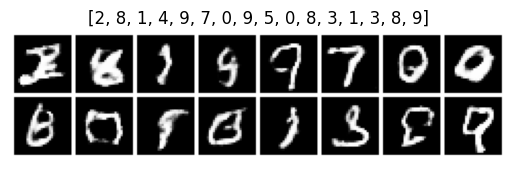

In [7]:
import matplotlib.pyplot as plt
with torch.no_grad():
  # Define the fixed noise vector for generating samples
  sample_noise = torch.randn(100, 100, device=device)
  generated_images = generator(sample_noise)
  generated_images = 0.5 * (generated_images + 1)
  output = model(generated_images)
  pred = output.argmax(dim=1, keepdim=True)
  grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
  plt.imshow(grid.permute(1, 2, 0))
  plt.axis('off')
  plt.title([int(pred[x]) for x in range(16)])
  plt.show()
  #print(torch.exp(output[0])) # torch.exp converts th



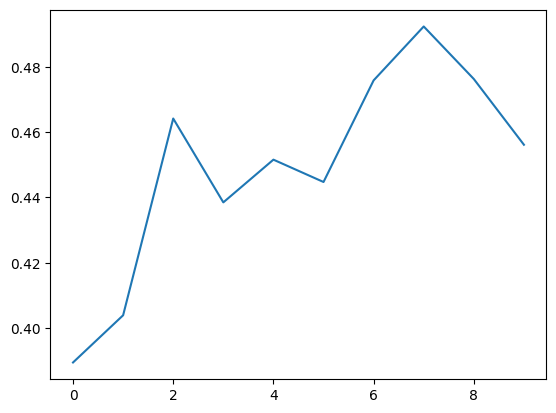

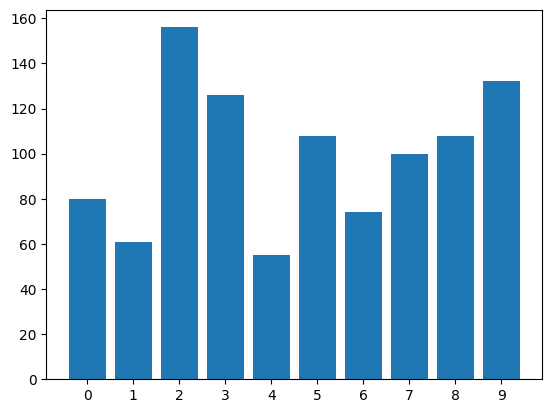

In [6]:
import matplotlib.pyplot as plt

plt.plot([c.cpu() for c in confidences])
plt.show()
plt.bar([f"{x}" for x in range(10)], counts)
plt.show()
